In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[4]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'bursi.pos.gspan'

In [29]:
%%time
# induce a grammar and train an estimator
training_graphs = get_graphs(dataset_fname, size=300)

from graphlearn.graphlearn import GraphLearnSampler
from eden.graph import Vectorizer
sampler=GraphLearnSampler(radius_list=[0,1], thickness_list=[2],random_state=42447,
                          min_cip_count=2, min_interface_count=2,
                          vectorizer=Vectorizer(5))
#take nu% of data as outlier
sampler.fit(training_graphs, nu=0.25, n_jobs=-1)

print('graph grammar stats:')
n_instances, interface_counts, core_counts, cip_counts = sampler.grammar().size()
print('#instances: %d   #interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (n_instances, interface_counts, core_counts, cip_counts))

sampler.save('sampler.ge')


graph grammar stats:
#instances: 300   #interfaces: 121   #cores: 54   #core-interface-pairs: 376
CPU times: user 39.1 s, sys: 2.64 s, total: 41.7 s
Wall time: 1min 13s


In [33]:
%%time
from graphlearn.graphlearn import GraphLearnSampler
sampler=GraphLearnSampler()
sampler.load('sampler.ge')

# graph sampling
graphs = get_graphs(dataset_fname, size=100)

id_start=30
id_end=id_start+4
from itertools import islice
graphs = islice(graphs,id_start,id_end)

# sample
n_steps=100
n_samples=2

from graphlearn.graphlearn import GraphLearnSampler
graphs = sampler.sample(graphs,
                        n_steps=n_steps, n_samples=n_samples,
                        target_orig_cip=True,
                        probabilistic_core_choice=False,
                        score_core_choice= False,
                        max_core_size_diff=3,
                        burnin=1,
                        omit_seed=False,
                        max_cycle_size=0,
                        improving_threshold=0.9, 
                        improving_linear_start=0.5,
                        accept_static_penalty=0.2,
                        n_jobs=1,
                        select_cip_max_tries=200,
                        keep_duplicates=True)

CPU times: user 1.55 s, sys: 56 ms, total: 1.6 s
Wall time: 1.61 s


90 50 0.02
0.04 52
0.06 53
0.1 55
0.12 56
0.14 57
0.18 59
0.22 61
0.24 62
0.26 63
0.28 64
0.32 66
0.34 67
0.36 68
0.38 69
0.4 70
0.42 71
0.44 72
0.5 75
0.52 76
0.54 77
0.56 78
0.58 79
0.6 80
0.62 81
0.66 83
0.68 84
0.7 85
0.72 86
0.74 87
0.76 88
0.78 89
0.8 90
0.82 91
0.84 92
0.86 93
0.88 94
0.9 95
0.92 96
0.94 97
0.96 98
0.98 99
Graph id: 30


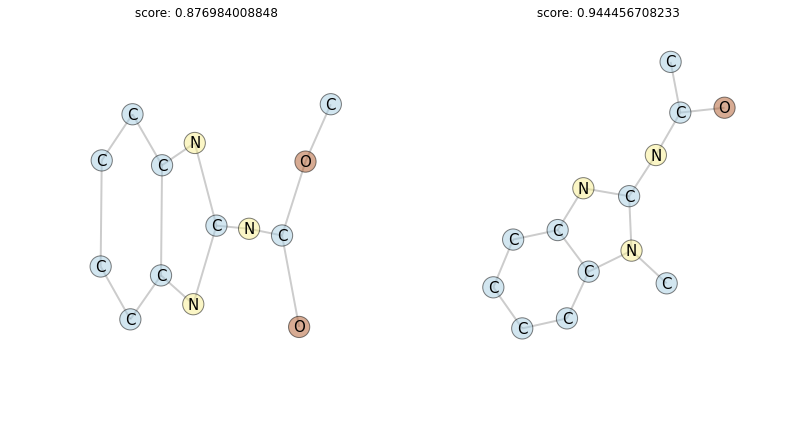

0.04 52
0.08 54
0.12 56
0.16 58
0.18 59
0.2 60
0.22 61
0.26 63
0.28 64
0.32 66
0.34 67
0.36 68
0.38 69
0.42 71
0.44 72
0.46 73
0.48 74
0.52 76
0.58 79
0.6 80
0.62 81
0.64 82
0.66 83
0.68 84
0.7 85
0.74 87
0.76 88
0.78 89
0.8 90
0.84 92
0.86 93
0.88 94
0.92 96
0.94 97
0.96 98
0.98 99
Graph id: 31


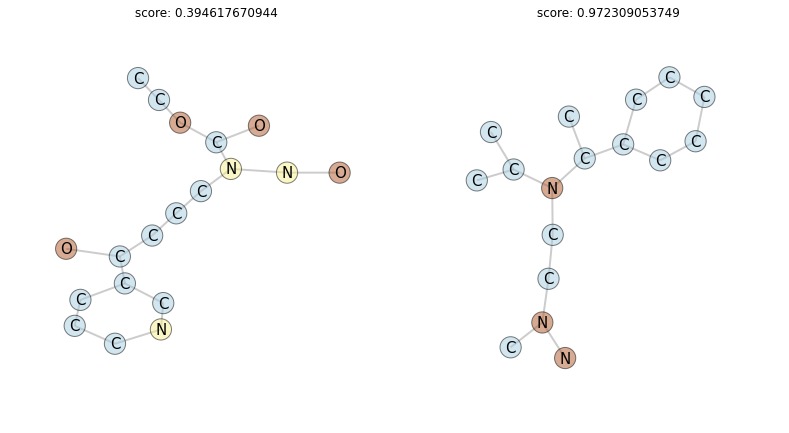

0.04 52
0.06 53
0.08 54
0.12 56
0.16 58
0.2 60
0.22 61
0.24 62
0.26 63
0.28 64
0.3 65
0.34 67
0.36 68
0.38 69
0.4 70
0.42 71
0.44 72
0.46 73
0.48 74
0.5 75
0.52 76
0.54 77
0.56 78
0.58 79
0.6 80
0.62 81
0.64 82
0.68 84
0.7 85
0.72 86
0.74 87
0.76 88
0.78 89
0.8 90
0.82 91
0.84 92
0.86 93
0.88 94
0.9 95
0.92 96
0.94 97
0.96 98
0.98 99
Graph id: 32


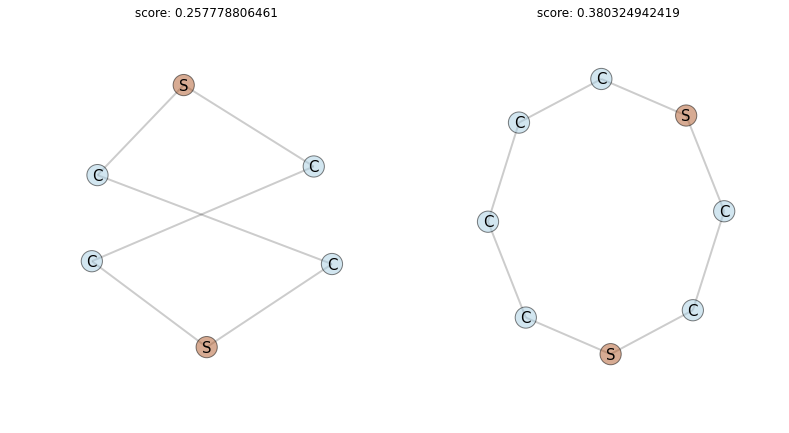

0.02 51
0.08 54
0.1 55
0.14 57
0.16 58
0.18 59
0.2 60
0.22 61
0.24 62
0.26 63
0.28 64
0.32 66
0.34 67
0.36 68
0.4 70
0.44 72
0.46 73
0.52 76
0.56 78
0.58 79
0.64 82
0.66 83
0.68 84
0.7 85
0.72 86
0.74 87
0.76 88
0.78 89
0.8 90
0.82 91
0.84 92
0.86 93
0.88 94
0.9 95
0.92 96
0.94 97
0.96 98
0.98 99
Graph id: 33


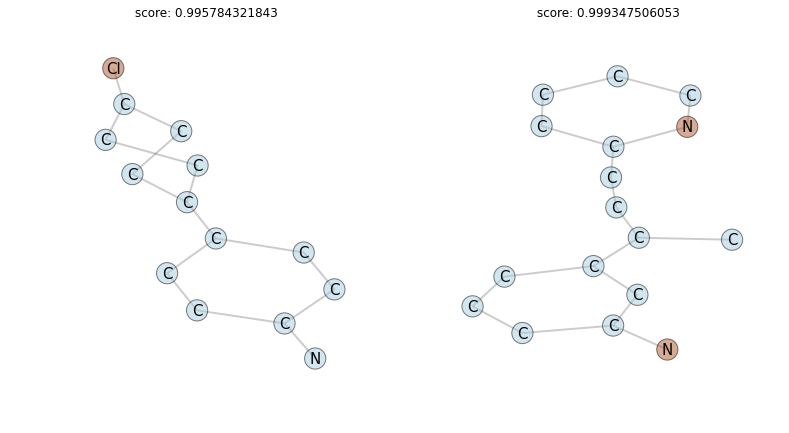

CPU times: user 1min 19s, sys: 476 ms, total: 1min 19s
Wall time: 1min 20s


In [34]:
%%time
# plot examples of sampling paths
from graphlearn.utils.draw import  graphlearn_draw, get_score_of_graph
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    graphlearn_draw(path_graphs,
                   n_graphs_per_line=6, size=7, 
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                   vertex_alpha=0.5, edge_alpha=0.2, node_size=450,
                   headlinehook=get_score_of_graph)

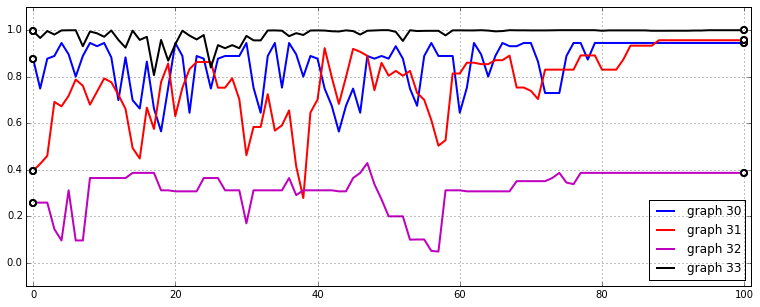

CPU times: user 280 ms, sys: 16 ms, total: 296 ms
Wall time: 305 ms


In [32]:
%%time
# plot sampling path score
from itertools import islice
import numpy as np
import pylab as plt
markevery=n_steps/(n_samples-1)
step=1
num_graphs_per_plot=4
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(13,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, linewidth=2, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        plt.plot(data, linestyle='None',markevery=markevery, markerfacecolor='white', marker='o', markeredgewidth=2,markersize=6)
    plt.legend(loc='lower right')
    plt.grid()
    plt.xlim(-1,n_steps+1)
    plt.ylim(-0.1,1.1)
    plt.show()

.